<a href="https://colab.research.google.com/github/peterphoenix/School-Projects/blob/master/Assignment_2_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP6577_LA01_ASG2 - Peter Phoenix 2201735413

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data =pd.read_csv("/content/drive/My Drive/Colab Notebooks/listings.csv")
data = data.dropna()
print(data.dtypes)
print(data.isna().values.any())

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
False


**Regression**

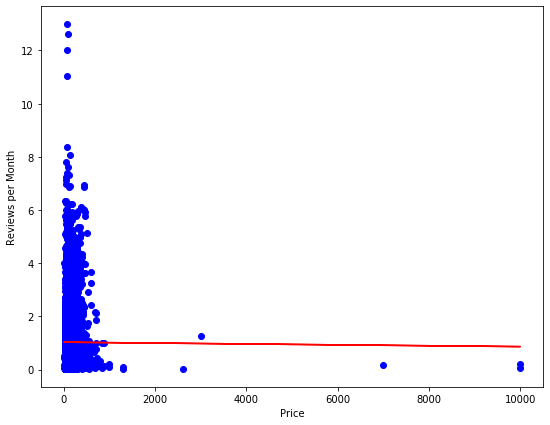

In [ ]:
newData = data[["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]]
train, test = train_test_split(newData, test_size = 0.2)
regression = linear_model.LinearRegression()
regression.fit(train[["price"]], train[["reviews_per_month"]])
plt.scatter(train["price"], train["reviews_per_month"], color = "blue")
a = regression.coef_
b = regression.intercept_
X = train[["price"]]
Y = a * X + b
plt.plot(X, Y, "-r")
plt.xlabel("Price")
plt.ylabel("Reviews per Month")
plt.rcParams["figure.figsize"] = [9,7]
plt.show()

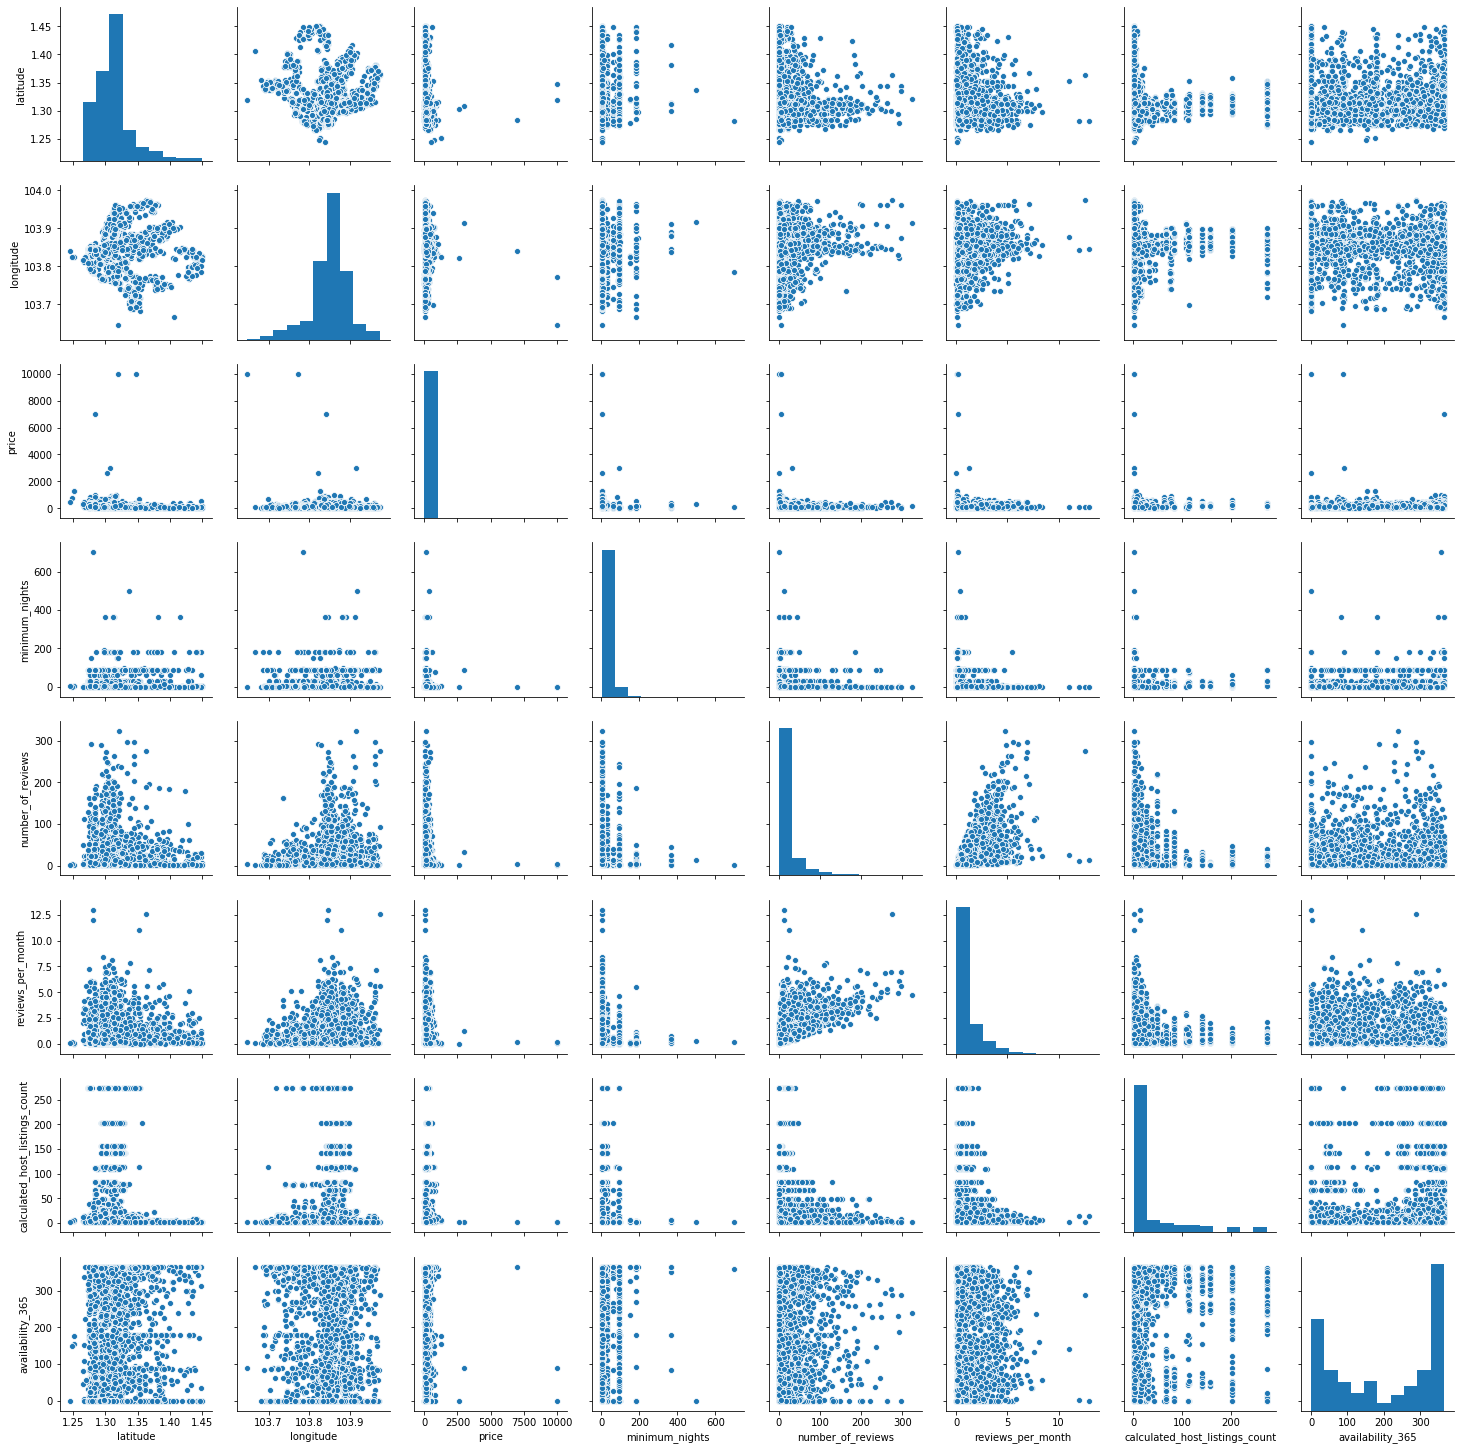

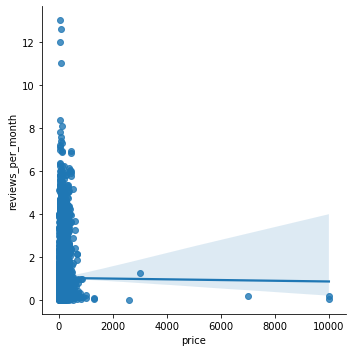

In [ ]:
sb.pairplot(train) 
sb.lmplot("price", "reviews_per_month", data = train)
plt.show()

**Classification**

In [ ]:
data2 =pd.read_csv("/content/drive/My Drive/Colab Notebooks/listings.csv")
#ganti roomtype ke int make onehot encoder?
for i in data2:
  print(i, data2[i].dtypes)
  if data2[i].isna().values.any() and data2[i].dtypes != object:
      data2[i] = data2[i].fillna(data2[i].mean())

train, test = train_test_split(data2, test_size=0.1)

id int64
name object
host_id int64
host_name object
neighbourhood_group object
neighbourhood object
latitude float64
longitude float64
room_type object
price int64
minimum_nights int64
number_of_reviews int64
last_review object
reviews_per_month float64
calculated_host_listings_count int64
availability_365 int64


In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 3).fit(train[["room_type"]], train["price"])

In [ ]:

classification = KNN.predict(test[["room_type"]])
accuracy = accuracy_score(test["price"], classification)
MAE = mean_absolute_error(test["price"], classification)
MSE = mean_squared_error(test["price"], classification)

print(" ACC : %.2f" % accuracy)
print(" MAE : %.2f" % MAE)
print(" MSE : %.2f" % MSE)